<a href="https://colab.research.google.com/github/Elena-Rangelov/AI_Checkers_Project/blob/main/Homework_2_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Reinforcement Learning
Name: **Elena Rangelov**

UID: **118804934**

Please submit a PDF containing all outputs to gradescope by March 26th at 11:59 PM.


----------------------------


In this assignment you will learn how to train a simple environment using Q-learning as taught in class.


First you will use a popular python package called gymnasium to create a simple Grid World environment.

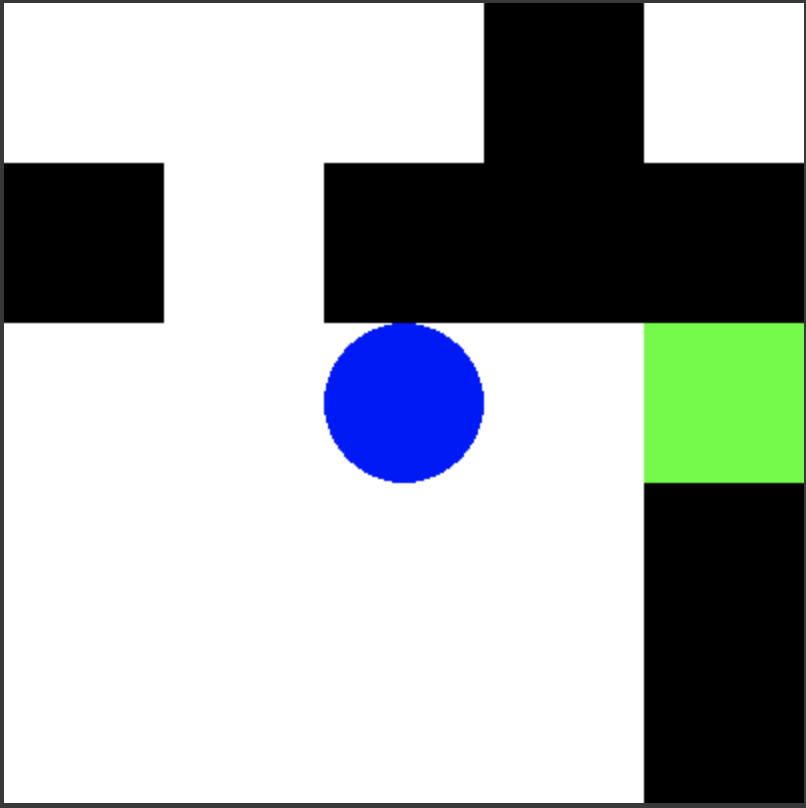

After you have a working environment you will implement Q-Learning and use it to solve your implementation of grid world.

Finally, you will show that you have implemented everything correctly by showing that you can use your Q-Learning algorithm to train an environment already included in the gymnasium package.

# Part 1: Implementing a Gymnasium Environment

We will start by implementing a simple gymnasium environment. You can find documentation for the whole package here https://gymnasium.farama.org/index.html#.

First let's install the necessary packaged

In [269]:
# Install the necessary packages
!pip install gymnasium pyvirtualdisplay > /dev/null 2>&1
!pip install pygame

Next we'll import the packages you'll need

In [270]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pygame

First we will initialize our new class. This class will need to take in 3 arguments. The width and height of the grid as well as the description for our grid world environment.


Your environment must be able to handle any given width and height as well as any given description. The description will come in the form of a string that specify the block order from left to right. There are three possible types of blocks.


1.   "I" specifies that a block should be ice
2.   "H" specifies that a block should be a hole
3.   "G" specifies that a block should be the goal.

For example an environment with width 3, height 3 and a description "IIHHIIIIG" looks like this

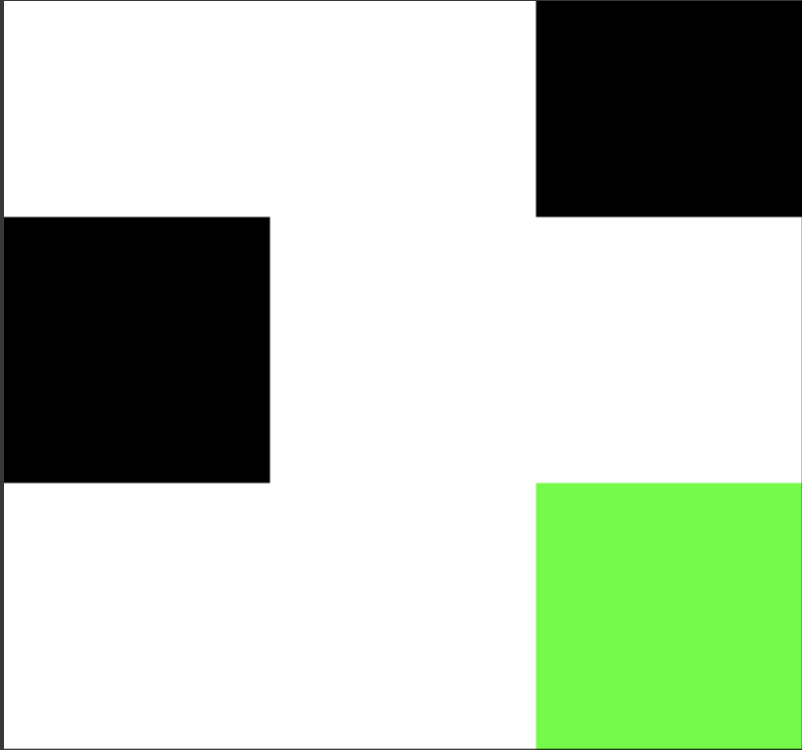

Every gymnasium class must define an observation and an action space of type "space." You can find a description of spaces here https://gymnasium.farama.org/api/spaces/. In addition to the space you will probably want to include other information in the init function such as the location of the agent and the description of the grid. These are style choices please represent these however you would like.




In [271]:
class FrozenLake(gym.Env):
  def __init__(self, grid_width, grid_height, grid_description):

      self.action_space = spaces.Discrete(4)
      self.observation_space = spaces.Tuple((spaces.Discrete(grid_width), spaces.Discrete(grid_height)))

      self.width = grid_width
      self.height = grid_height

      self.agent_loc = (0, 0)
      self.grid = [[grid_description[i*self.width + j] for j in range(self.width)] for i in range(self.height)]

  def _get_info(self):
    return self.agent_loc

The next method you will define for your class is the _get_obs method. This should return the observation for your environment. Think of how we defined an observation in class and return that here.

In [272]:
class FrozenLake(FrozenLake):
  def _get_obs(self):
      return self.agent_loc

Next, please define a reset function. This should return your environment to its original state. We have returned the correct output for you. All you need to do is reset any necessary variables.


In [273]:
class FrozenLake(FrozenLake):
  def reset(self, seed=None, options=None):
    super().reset(seed=seed)

    self.agent_loc = (0, 0)

    observation = self._get_obs()
    info = self._get_info()

    return observation, info

Now write the method that will return the reward for a given observation.

Hint: In addition to thinking about rewards in the grid you will need to account for rewards when the agent "escapes" the grid.

In [274]:
class FrozenLake(FrozenLake):
  def compute_reward(self, observation):
    x = observation[0]
    y = observation[1]
    if x < 0 or x >= self.width or y < 0 or y >= self.height:
      return -1
    if self.grid[y][x] == 'G':
      return 10
    if self.grid[y][x] == 'H':
      return -1
    else: return 0

Given an action you will want to modify the current state of your environment to account for the action. Additionally, given the observation and reward determine if the episode is over or not.

Hint: you will need to determine if the agent is out of the grid(either out of bounds or in a hole) or at the goal.

In [275]:
class FrozenLake(FrozenLake):
  def step(self, action):

      #TODO: Set terminated to true if the episode is completed and false otherwise

      if action == 0:
        self.agent_loc = (self.agent_loc[0], self.agent_loc[1] + 1)
      elif action == 1:
        self.agent_loc = (self.agent_loc[0], self.agent_loc[1] - 1)
      elif action == 2:
        self.agent_loc = (self.agent_loc[0] + 1, self.agent_loc[1])
      elif action == 3:
        self.agent_loc = (self.agent_loc[0] - 1, self.agent_loc[1])

      observation = self._get_obs()
      reward = self.compute_reward(observation)

      terminated = False

      if reward != 0:
        terminated = True


      return observation, reward, terminated, False, None

Use pygame to render your environment (https://www.pygame.org/docs/). You will need to obtain the current observation as well as the description of the grid to do this. If you want to render it the same way we did you should be able to complete this function using only the pygame.draw.rect and pygame.draw.circle functions. You're welcome to make something that looks better, but it's not required.



In [276]:
class FrozenLake(FrozenLake):
  def _render_frame(self, screen, window_width, window_height):

    row = 0
    for arr in self.grid:
      col = 0
      for ch in arr:
        color = ""
        if ch == "I":
          color = "white"
        elif ch == "H":
          color = "black"
        elif ch == "G":
          color = "green"

        pygame.draw.rect(screen, color, [col*(window_width/self.width), row*(window_height/self.height), window_width/self.width, window_height/self.height])
        col += 1
      row += 1
    pygame.draw.circle(screen, "blue", [(self.agent_loc[0]*(window_width/self.width) + window_width/self.width/2), (self.agent_loc[1]*(window_height/self.height) + window_height/self.height/2)], window_width/self.width/2)


  def render(self, screen, window_width, window_height):
    return self._render_frame(screen, window_width, window_height)

If you have implemented everything correctly, the following code should render your environment and move the agent randomly. Make sure to include these images in your saved PDF.

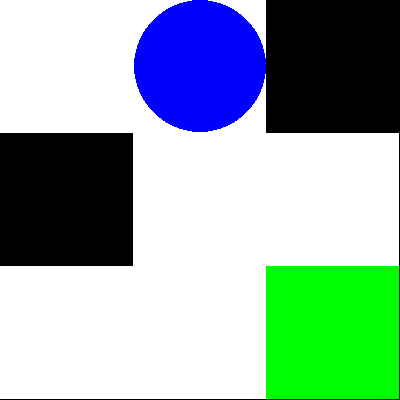

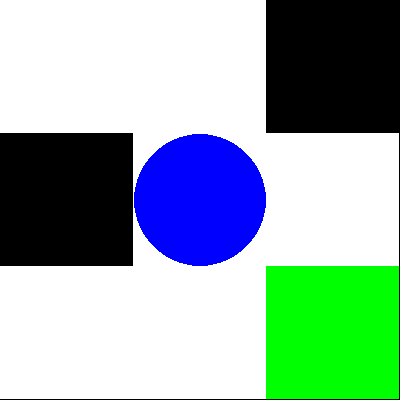

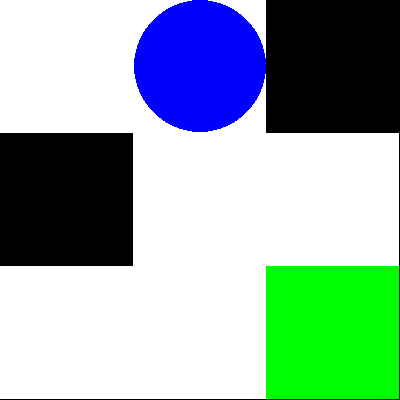

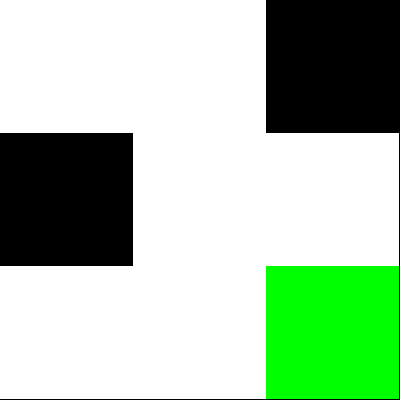

In [277]:
import cv2
from IPython.display import clear_output
from google.colab.patches import cv2_imshow
import time

lake = FrozenLake(3, 3, "IIHHIIIIG")
window_width = 400
window_height = 400
pygame.init()
screen = pygame.display.set_mode((window_width, window_height))

for i in range(0, 1):
  observation, info = lake.reset()
  terminated = False
  while not terminated:
    action = lake.action_space.sample()
    observation, reward, terminated, truncated, info = lake.step(action)
    lake.render(screen, window_width, window_height)

    view = pygame.surfarray.array3d(screen)
    view = view.transpose([1, 0, 2])
    img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
    cv2_imshow(img_bgr)
    time.sleep(.5)

# Part 2: Implement Q-Learning

We will implement a simple algorithm that should be able to solve any gymnasium environment with discrete observation and action spaces.

In the init function we will pass in the environment as well as the percentage of time the policy should explore versus exploit. We will also pass in gamma and alpha as defined in the bellman equation you learned in class. obs_space_n and action_space_n should represent the dimensions of the observation and action spaces.

We have defined everything for you except the Q-Table. Please design this however you want.

In [278]:
import random

class QLearning():
  def __init__(self, env, exploration, gamma, alpha, obs_space_n, action_space_n):
    self.env = env
    self.exploration = exploration
    self.gamma = gamma
    self.alpha = alpha

    #TODO: Define your q table such that you can easily access the q value for (s,a)

    self.q_table = [[[0, 0, 0, 0] for _ in range(env.width)] for _ in range(env.height)]


Define a method that should sample an action from the policy. Remember to balance the amount of exploring you do versus the amount of exploiting.

In [279]:
class QLearning(QLearning):
  def sample_action(self, observation):
    x = int(observation/self.env.width)
    y = observation%self.env.width
    val = random.random()
    if val < self.exploration:
      return self.env.action_space.sample()
    else:
      return np.argmax(self.q_table[y][x])


Define a method that updates your q-table.

In [280]:
class QLearning(QLearning):
  def update_table(self, observation, action, reward, new_observation, terminated):
    x = observation[0]
    y = observation[1]
    nx = new_observation[0]
    ny = new_observation[1]

    if terminated:
      self.q_table[y][x][action] = (1-self.alpha) * self.q_table[y][x][action] + self.alpha * (reward)

    else:
      self.q_table[y][x][action] = (1-self.alpha) * self.q_table[y][x][action] + self.alpha * (reward + self.gamma * max(self.q_table[ny][nx]) - self.q_table[y][x][action])




Use the two classes defined below to train your policy so that it solves the environment.

In [281]:
import pprint

lake = FrozenLake(5, 5, "IIIHIHIHHHIIIIGIIIIHIIIIH")
q_learning = QLearning(lake, .3, .99, .9, lake.width * lake.height, lake.action_space.n)

observation = (0, 0)
for i in range(10000):
  observation, info = lake.reset()
  terminated = False
  while not terminated:
    action = q_learning.sample_action(observation[0] * lake.width + observation[1])
    new_observation, reward, terminated, truncated, info = lake.step(action)
    q_learning.update_table(observation, action, reward, new_observation, terminated)
    observation = new_observation


# TODO: Train your policy using QLearning

If you have trained everything right this method should demonstrate a solved environment. Please make sure to include these results in your saved PDF.

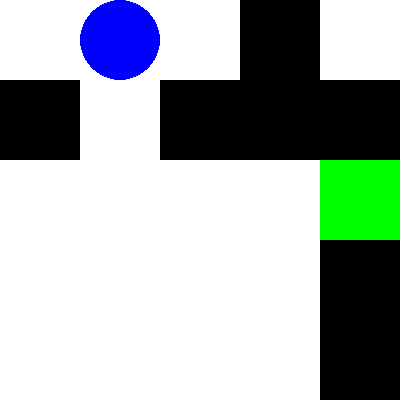

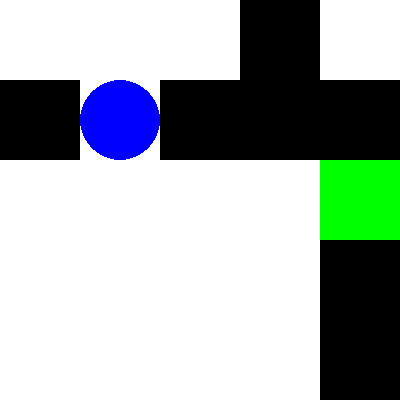

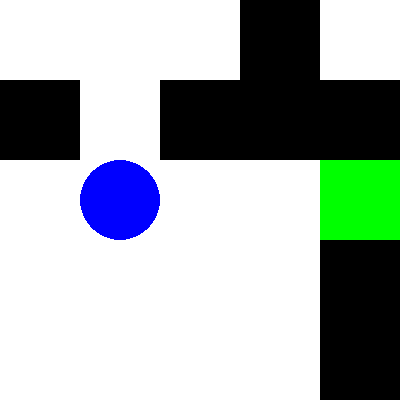

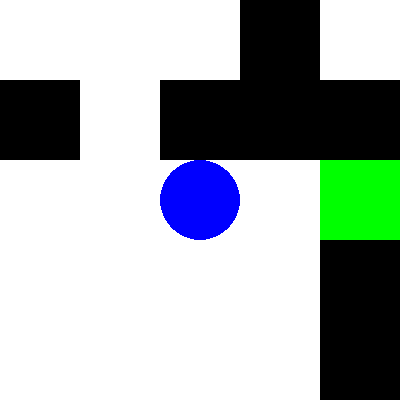

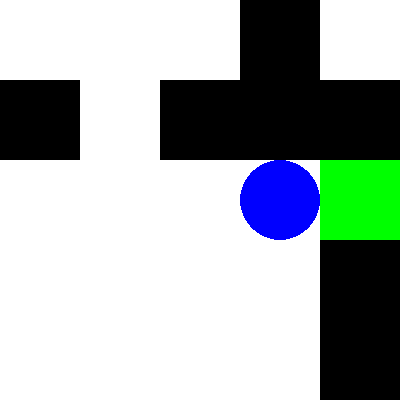

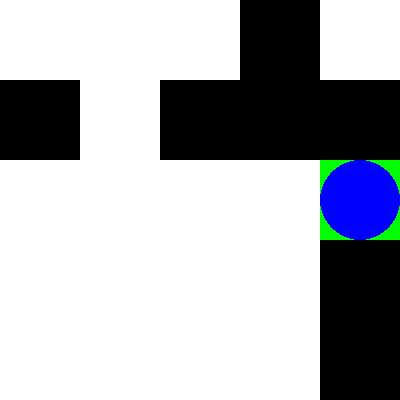

In [282]:
q_learning.exploration = 0.0
for i in range(0, 1):
  observation, info = lake.reset()
  terminated = False
  lake.render(screen, window_width, window_height)
  view = pygame.surfarray.array3d(screen)
  view = view.transpose([1, 0, 2])
  img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
  cv2_imshow(img_bgr)
  time.sleep(.5)
  clear_output()
  while not terminated:
    action = q_learning.sample_action(observation[0] * lake.width + observation[1])
    observation, reward, terminated, truncated, info = lake.step(action)
    lake.render(screen, window_width, window_height)

    view = pygame.surfarray.array3d(screen)
    view = view.transpose([1, 0, 2])
    img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
    cv2_imshow(img_bgr)
    time.sleep(.5)
    print()